
<h1>
Clasificación entre 3 diferentes especies de la flor Iris mediante el algoritmo supervisado random forest

<hr>



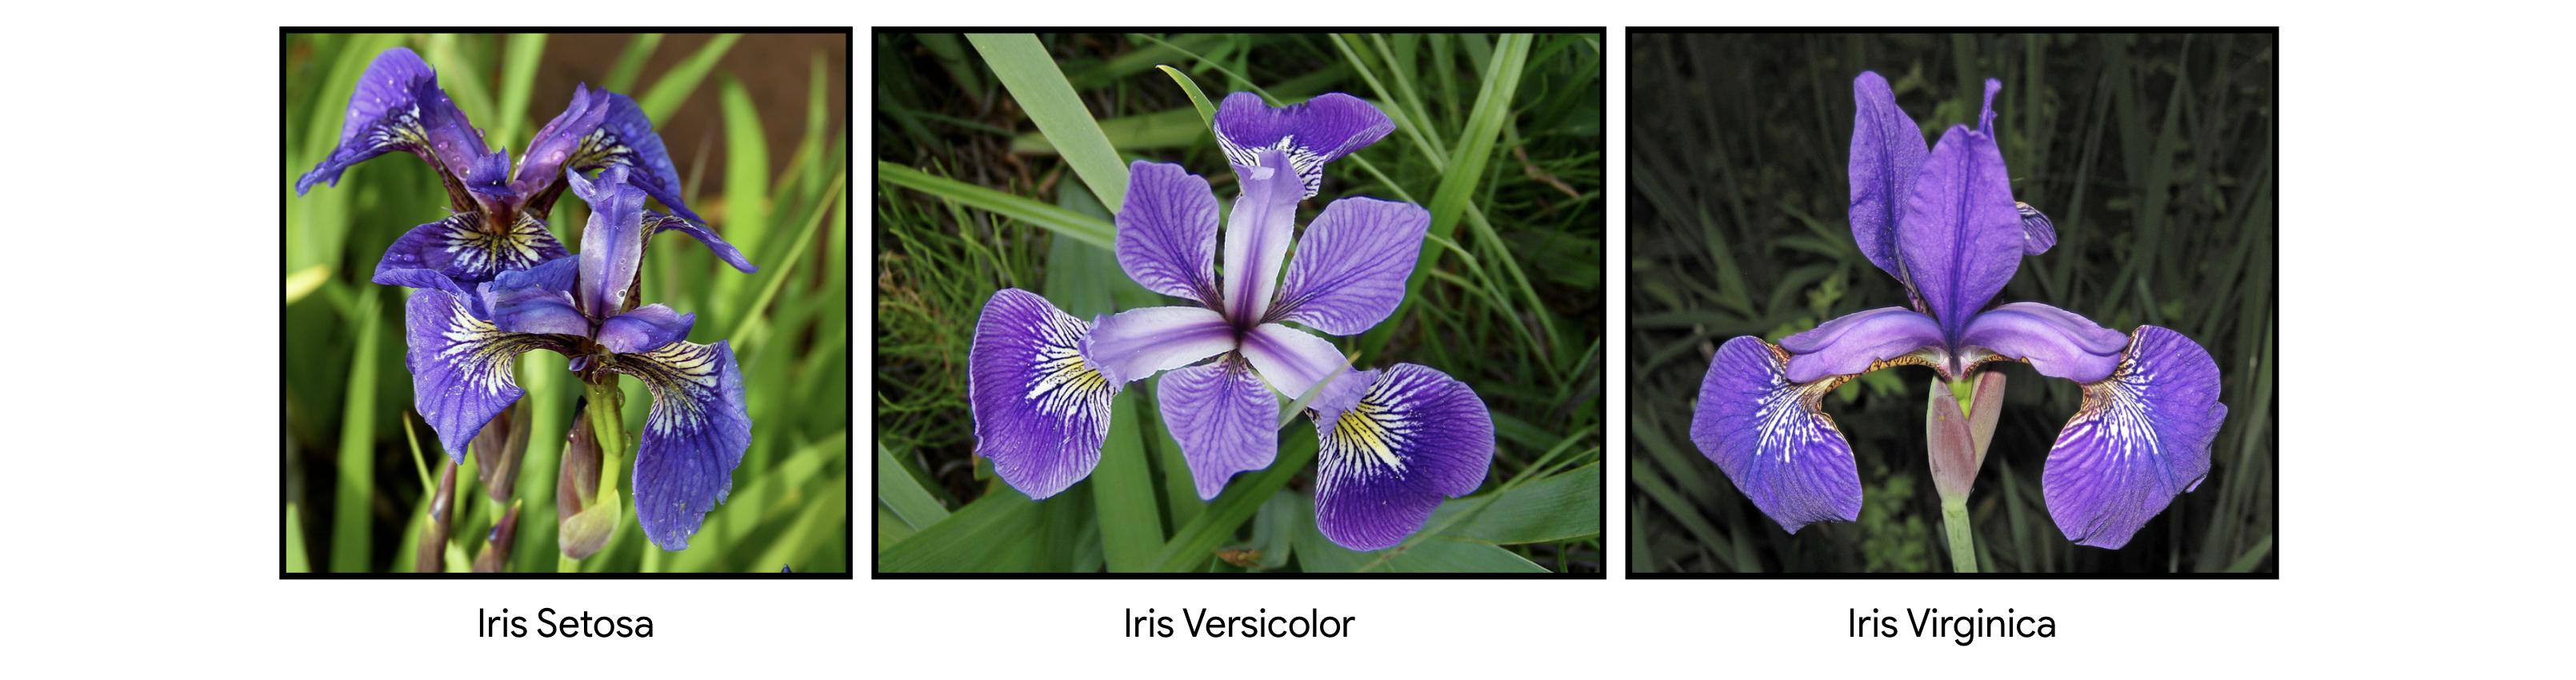

In [93]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# importamos el dataset iris 
from sklearn.datasets import load_iris

# importamos un clasificador basado en random forest 
from sklearn.ensemble import RandomForestClassifier

# cargando y mostrando la imagen del pétalo y el sépalo
from PIL import Image

In [94]:
# generar un pre-set de datos que sean aleatorios
np.random.seed(0)

# cargando el dataset en una variable
iris = load_iris()

# Características de los datos

In [95]:
# las features en nuestro dataset corresponden al largo-ancho del pétalo y el largo-ancho del sépalo
data_frame = pd.DataFrame(iris.data, columns=iris.feature_names)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [96]:
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
data_frame.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# Se le agregan los nombres de las especies

In [98]:
data_frame['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Separar el dataset en 80% para entrenamiento y 20% para test

In [113]:
train_random = np.random.rand(len(data_frame)) < 0.8

train = data_frame[train_random]
print('El dataset de entrenamiento tiene {} datos'.format(len(train)))

El dataset de entrenamiento tiene 118 datos


In [114]:
test = data_frame[~train_random]
print('El dataset de test tiene {} datos'.format(len(test)))

El dataset de test tiene 32 datos


# Para entrenar el modelo solamente se necesita las medidas del pétalo y el sépalo

In [115]:
features = data_frame.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Para la predicción solamente se tienen 3 valores

In [116]:
y = pd.factorize(train['species'])[0]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


# Clasificador Random Forest con 2 hilos corriendo en paralelo y comienza con un estado aleatorio en 0

In [117]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)


# Entrenamiento del modelo supervisado

In [118]:
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Ver cual de las features fué la de mayor importancia para el modelo

[('sepal length (cm)', 0.10049443595479976), ('sepal width (cm)', 0.022359288546621964), ('petal length (cm)', 0.43363449306945495), ('petal width (cm)', 0.4435117824291233)] 



Text(0, 0.5, 'características')

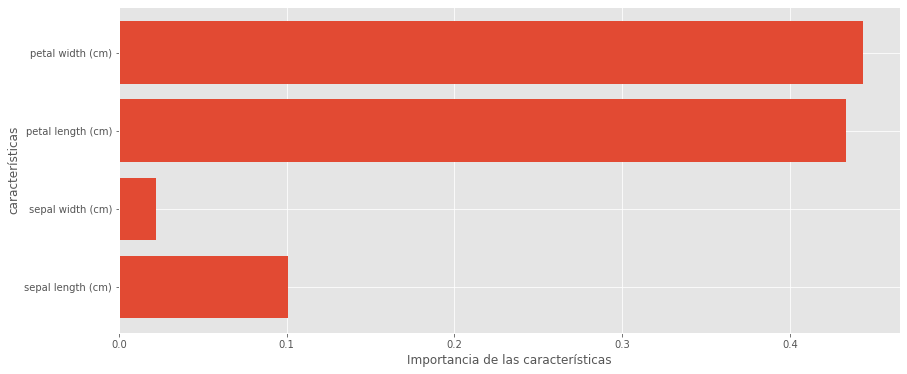

In [119]:
print( list(zip(train[features], clf.feature_importances_)) , '\n')

plt.figure(figsize=(14,6))
plt.barh(list(train[features]), clf.feature_importances_)
plt.xlabel('Importancia de las características')
plt.ylabel('características')

# Realizar predicciones para el conjunto de test

In [120]:
predicted_values = clf.predict(test[features])
predictions = iris.target_names[predicted_values]
print(predictions)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']


# Análisis de predicciones mediante una matriz de confusión

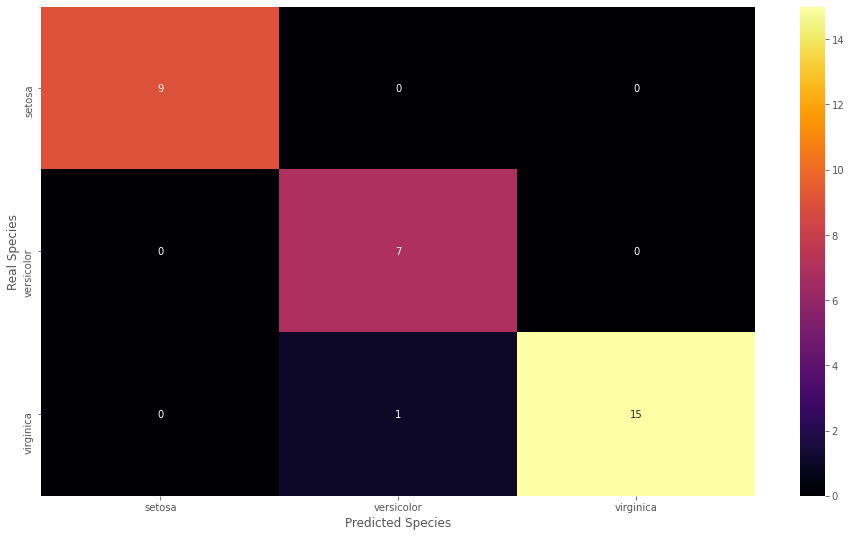

In [121]:
confusion_matriz = pd.crosstab(test['species'], predictions, rownames=['Real Species'], colnames=['Predicted Species'])
sns.heatmap(confusion_matriz, annot=True, cmap='inferno')